Lambda School Data Science

*Unit 4, Sprint 3, Module 3*

---

# Autoencoders

> An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.[1][2] The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name. 

## Learning Objectives
*At the end of the lecture you should be to*:
* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
* <a href="#p2">Part 2</a>: Train an autoencoder
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem

__Problem:__ Is it possible to automatically represent an image as a fixed-sized vector even if it isn’t labeled?

__Solution:__ Use an autoencoder

Why do we need to represent an image as a fixed-sized vector do you ask? 

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

We've already seen *representation learning* when we talked about word embedding modelings during our NLP week. Today we're going to achieve a similiar goal on images using *autoencoders*. An autoencoder is a neural network that is trained to attempt to copy its input to its output. Usually they are restricted in ways that allow them to copy only approximately. The model often learns useful properties of the data, because it is forced to prioritize which aspecs of the input should be copied. The properties of autoencoders have made them an important part of modern generative modeling approaches. Consider autoencoders a special case of feed-forward networks (the kind we've been studying); backpropagation and gradient descent still work. 

# Autoencoder Architecture (Learn)
<a id="p1"></a>

## Overview

The *encoder* compresses the input data and the *decoder* does the reverse to produce the uncompressed version of the data to create a reconstruction of the input as accurately as possible:

<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

The learning process gis described simply as minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ is a loss function penalizing $g(f(x))$ for being dissimiliar from $x$ (such as mean squared error)
- $f$ is the encoder function
- $g$ is the decoder function

## Follow Along
### Extremely Simple Autoencoder

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 3.8MB 48.5MB/s 
     |████████████████████████████████| 450kB 40.1MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations; mnist is 28x28, which results in 784
# we want to get it to 32
# We are not doing sequential api anymore, we are instead using the functional api (something
# called model because we treat the layers like functions)
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# specifying the input layer
# this is our input placeholder
input_img = Input(shape=(784,))


# we are doing a very simple autoencoder; one layer for the encoder and one for the
# decoder
# "encoded" is the encoded representation of the input
# since there are only two layers in the model 'encoded' and 'decoded'; are using 
# 32 or var encoding_dim
# activation funct can be 'relu', because it works well in NN as a default
encoded = Dense(encoding_dim, activation='relu')(input_img) # 'Dense' is a function of both
                                                            # the enc_dim, act, and the input
                                                            # think of 'input_img' as being an
                                                            #input to 'Dense'

# Decoded layer should have 784 neurons, with a 'sigmoid' funct because we want to 
# restrict the pixel values between 0 - 1 and we want the actrivation funct to be
# restricted in that same way; squishify the output
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# still missing the step to bring everything together, 'Model'
# model takes in input layer and output layer

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [0]:
# specifying separate model because this is going to be the product we need
# Encoder is really what we want and need to access later
# because we share layers, weights, params, etc, we can use the trained autoencoder
# we can make predictions with 'encoder' without ever having to call .fit, or .compile method

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
'''
slightly different way of showing the same thing; this is cutting the model in half.
'''
# Create a separate Decoder Model (demo only)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# using binary cross entropy becuase we are looking at pixels from
# 0 to 1, and to see if pixel image are on or off
# why are we using 'binry_crossentropy'?  Because were looking at binary pixel vals;
# so we simply need to know if the pixel is on or off.

'''
something really good to study is loss functions and optimizers
'''

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

# running model, but we don't need the target, so common Py convention is using the underscore
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# wandb.init(project="mnist_autoencoder", entity="ds5")

# inputs need to be x_train, and the target is also x_train
# validation data is x_test, and x_test

# In the fit statement what do we need to pass as input?
# Ansr: x_train
# What are we trying to predict?
# Ansr: (also) x_train

# Simply put, we are trying to predict the input
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, x_test),   # x_test and x_test for val data
                verbose = True)

# we could potentially use early stopping but, meh

In [0]:
# encode and decode some digits
# note that we take them from the *test* set

'''
we need to create decoded images, whih is going to be the 
autoencoder.predict().
The results are trash.
'''
decoded_imgs = autoencoder.predict(x_test)

In [0]:
'''
this method takes the encoder and the decoder models created
and should yeild the same result.  Why would we do it this way?
Ansr: because is shows both sides of the autoencoder model
illustration.  If the model trains longer than we trained it to
get better results.
'''

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

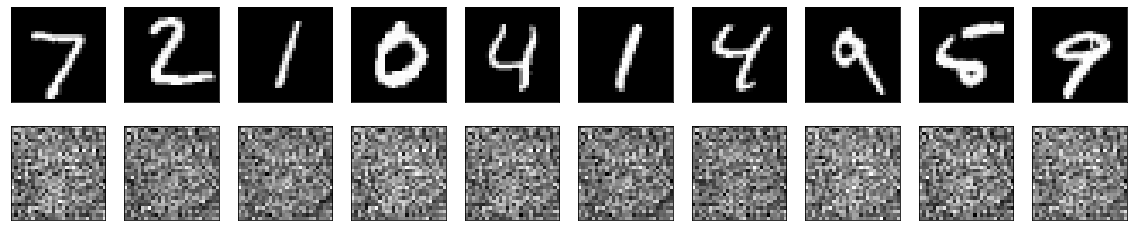

In [13]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Challenge

Expected to talk about the components of autoencoder and their purpose. 

In [0]:
'''
That previous architecture used for the autoencoder is extremely basic.
Most autoencoders are deep autoencoders; and the properties we care 
about is the basics, and we can then build on that.  
When building a more complex autencoder both sides need to mirror one another;
Game plan:
- deep autoencoder
- convolutional autoencoder
-
'''

# Train an Autoencoder (Learn)
<a id="p2"></a>

## Overview

As long as our architecture maintains an hourglass shape, we can continue to add layers and create a deeper network. 

## Follow Along

In [0]:
input_img = Input(shape=(784,))

# Here we create the encoder; the first side of the model
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# This layer is the inflection point of the network
encoded = Dense(32, activation='relu')(encoded)   # The output here the 'dry strawberry'
                                                  # which is minimization of the data


decoded = Dense(64, activation='relu')(encoded)   # this layer is the only layer that is
                                                  # not simetrical.  all other are excpet this one
                                                  # important to use the same architecutre; goal is 
                                                  # be a mirror image of the encdoed side
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

### Deep Autoencoder

In [0]:
# compile & fit model

# the autoencoder will be a model of the input image and the decoded
autoencoder = Model(input_img, decoded)

# Then we compile the autoencoder.  We will use 'nadam' because it seems to be best
# hyper param atm
# loss is 'binary_crossentropy' because we need ot make sure the output
# becase we are trying to predict if the pixel value predicted matches the overall
# value of the input we are trying to predict.
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = True)

60000/60000 [==============================] - 5s 79us/sample - loss: 0.0921 - val_loss: 0.0912
Epoch 46/1000
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0917 - val_loss: 0.0912
Epoch 47/1000
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0915 - val_loss: 0.0911
Epoch 48/1000
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0914 - val_loss: 0.0900
Epoch 49/1000
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0909 - val_loss: 0.0926
Epoch 50/1000
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0906 - val_loss: 0.0900
Epoch 51/1000
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0905 - val_loss: 0.0896
Epoch 52/1000
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0901 - val_loss: 0.0887
Epoch 53/1000
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0899 - val_loss: 0.0907
Epoch 54/1000
60000/6000

KeyboardInterrupt: ignored

In [0]:
decoded_imgs = autoencoder.predict(x_test)

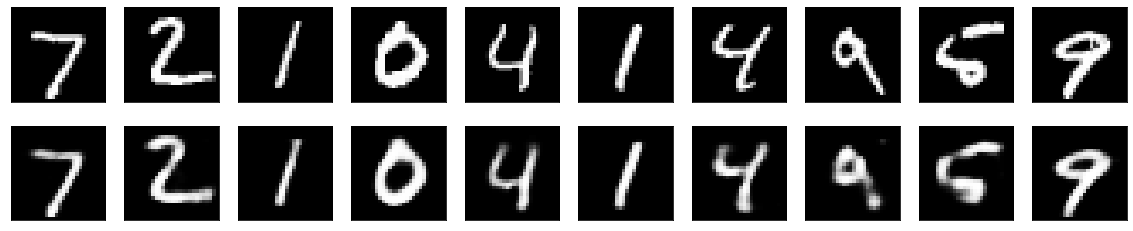

In [18]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

> Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

> Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Create Model 
input_img = Input(shape=(28, 28, 1)) # img size is 28x28, so we use 28x28, and
                                     # it is gray scalse so we use 1

# look into what same does, but we want the input and output to be same shape
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)
# this is the representatio, the shape is (4, 4, 8) which equals 128 dimnsional rep

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:


# autoencoder.fit(x_train, x_train,
#                 epochs=100,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test),
#                 verbose=True)

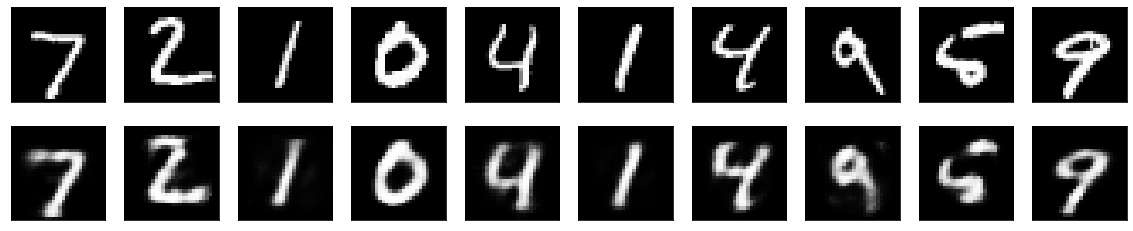

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Visualization of the Representations

In [0]:
encoder = Model(input_img, encoded)
encoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Challenge

You will train an autoencoder at some point in the near future. 

# Information Retrieval with Autoencoders (Learn)
<a id="p3"></a>

## Overview

A common usecase for autoencoders is for reverse image search. Let's try to draw an image and see what's most similiar in our dataset. 

To accomplish this we will need to slice our autoendoer in half to extract our reduced features. :) 

## Follow Along

In [0]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)

In [0]:
# encoded_imgs[0].reshape(128, 1).T

train = encoded_imgs.reshape((encoded_imgs.shape[0], 128))

In [0]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(encoded_imgs)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
nn.kneighbors(...)

## Challenge

You should already be familiar with KNN and similarity queries, so the key component of this section is know what to 'slice' from your autoencoder (the encoder) to extract features from your data. 

# Review

* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
    - Enocder
    - Decoder
* <a href="#p2">Part 2</a>: Train an autoencoder
    - Can do in Keras Easily
    - Can use a variety of architectures
    - Architectures must follow hourglass shape
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem
    - Extract just the encoder to use for various tasks
    - AE ares good for dimensionality reduction, reverse image search, and may more things. 


# Sources

__References__
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Deep Learning Cookbook](http://shop.oreilly.com/product/0636920097471.do)

__Additional Material__